#Importing and Downloading the dataset

In [1]:
# Library for plotting the images and the loss function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
# We import the data set from tensorflow and build the model there
from tensorflow.keras import datasets, layers, models

# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


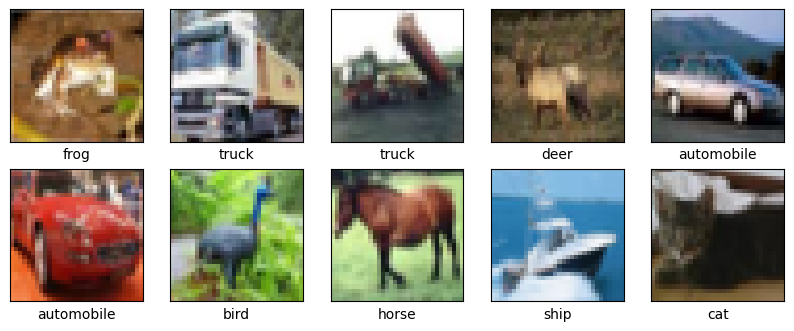

In [2]:
# Define the 10 image classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Show the first 10 images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#Building a CNN

#Model 1: PseudoRandom Numbers Model

Generating Pseudorandom numbers weights

In [3]:
def psuedo_random(shape, dtype=None):
    nums = np.random.randint(-100, 100, shape)
    return nums

Adding the CNN Layers

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer = psuedo_random, input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer = psuedo_random ))
model.add(layers.MaxPooling2D((2, 2)))

In [5]:
model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer = psuedo_random ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_initializer = psuedo_random ))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

#Compiling and Training

In [6]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy','mse','mae'])

# history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

#Model 2: Quantum Random Numbers

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
file_path = '/content/drive/MyDrive/Datasets/random2_line seperated (2).dat'
quant_nums = list(pd.read_csv(file_path).to_numpy().flatten())

Generating Quantum Numbers weights

In [9]:
def quant_random(shape, dtype=None):
    nums = np.random.choice(quant_nums, shape, replace = True)
    return nums

Adding the CNN Layers

In [10]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer = quant_random, input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer = quant_random ))
model2.add(layers.MaxPooling2D((2, 2)))

In [11]:
model2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer = quant_random ))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu', kernel_initializer = quant_random ))
model2.add(layers.Dense(10))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [12]:
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy','mse','mae'])

# history2 = model2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

#Evaluation and Comparison

In [13]:
def multiruns(psuedo_random, quant_random, n_runs = 10, epochs = 20):
    mae_psuedo, mae_quant, mse_psuedo, mse_quant, r2_psuedo, r2_quant = [], [], [], [], [], []
    print(n_runs)
    for run in range(n_runs):
        history_psuedo = psuedo_random.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
        history_quant = quant_random.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

        pred_psuedo = np.argmax(model.predict(test_images), axis=1)
        pred_quant = np.argmax(model2.predict(test_images), axis=1)

        mse_psuedo.append(mean_squared_error(test_labels, pred_psuedo))
        mse_quant.append(mean_squared_error(test_labels, pred_quant))

        mae_psuedo.append(mean_absolute_error(test_labels, pred_psuedo))
        mae_quant.append(mean_absolute_error(test_labels, pred_quant))

        r2_psuedo.append(r2_score(test_labels, pred_psuedo))
        r2_quant.append(r2_score(test_labels, pred_quant))

    return mae_psuedo, mae_quant, mse_psuedo, mse_quant, r2_psuedo, r2_quant

In [14]:
mae_psuedo, mae_quant, mse_psuedo, mse_quant, r2_psuedo, r2_quant = multiruns(model, model2, n_runs = 10, epochs = 10)

10
Epoch 1/10
1563/1563 [==============================] - 21s 7ms/step - loss: 27699509248.0000 - accuracy: 0.1683 - mse: 9114187893388712345600.0000 - mae: 89685663744.0000 - val_loss: 12771475456.0000 - val_accuracy: 0.1997 - val_mse: 9531877618528909524992.0000 - val_mae: 93990395904.0000
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 8167652864.0000 - accuracy: 0.2146 - mse: 9767603904324829184000.0000 - mae: 95651250176.0000 - val_loss: 5602562560.0000 - val_accuracy: 0.2203 - val_mse: 10003384233316277288960.0000 - val_mae: 97120460800.0000
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 3044922112.0000 - accuracy: 0.2203 - mse: 9877620087822049345536.0000 - mae: 96667484160.0000 - val_loss: 1902362496.0000 - val_accuracy: 0.1858 - val_mse: 9757940305424398942208.0000 - val_mae: 96191561728.0000
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1235703168.0000 - accuracy: 0.2014 - mse: 917572395

In [15]:
mae_psuedo


[2.7529,
 3.0945,
 2.6983,
 2.5005,
 3.0966,
 2.5002,
 4.4924,
 3.6946,
 2.7018,
 3.6946]

In [16]:
mae_quant

[3.208, 4.4939, 2.5025, 4.4981, 3.0997, 3.1008, 3.6978, 2.7019, 2.5023, 2.7016]

In [17]:
mse_psuedo

[13.0561,
 14.4799,
 10.5009,
 8.5075,
 14.486,
 8.5064,
 28.448,
 20.4692,
 10.5092,
 20.4692]

In [18]:
mse_quant

[16.2058,
 28.4617,
 8.5225,
 28.4901,
 14.4997,
 14.5072,
 20.4868,
 10.5133,
 8.5141,
 10.5088]

In [19]:
r2_psuedo

[-0.5825575757575758,
 -0.755139393939394,
 -0.27283636363636354,
 -0.031212121212121247,
 -0.7558787878787878,
 -0.031078787878787928,
 -2.4482424242424243,
 -1.4811151515151515,
 -0.2738424242424242,
 -1.4811151515151515]

In [20]:
r2_quant

[-0.9643393939393938,
 -2.4499030303030302,
 -0.033030303030302965,
 -2.4533454545454547,
 -0.757539393939394,
 -0.7584484848484849,
 -1.483248484848485,
 -0.2743393939393939,
 -0.03201212121212116,
 -0.2737939393939395]

Text(0.5, 1.0, 'MSE')

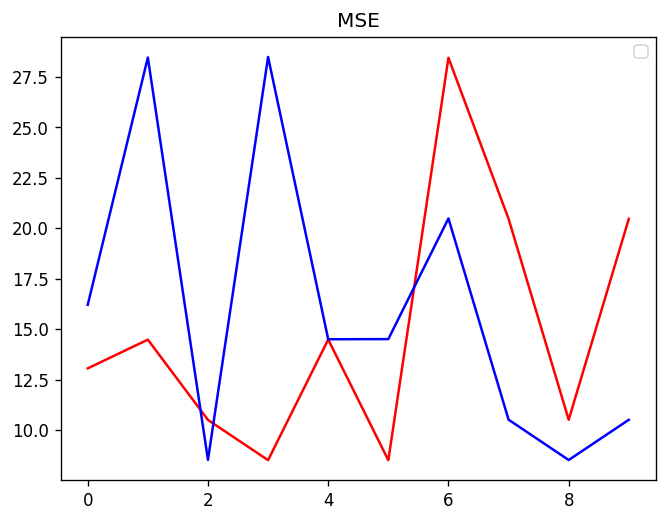

In [23]:
plt.figure(dpi = 120)
plt.plot(mse_psuedo, c = 'r')
plt.plot(mse_quant, c = 'b')
plt.legend()
plt.title('MSE')

Text(0.5, 1.0, 'MAE')

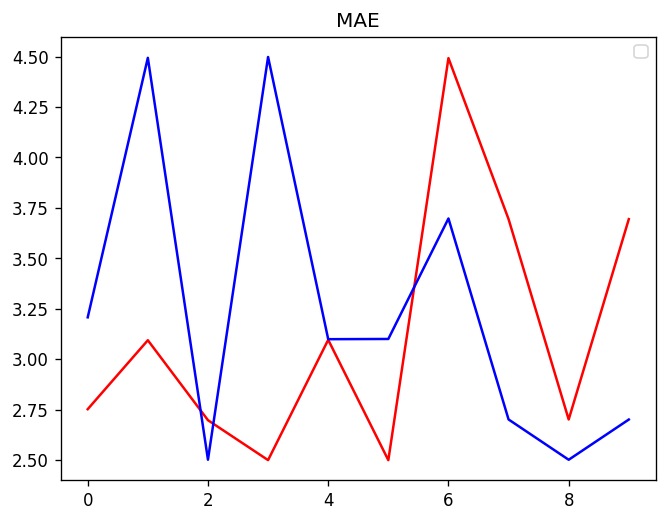

In [24]:
plt.figure(dpi = 120)
plt.plot(mae_psuedo, c = 'r')
plt.plot(mae_quant, c = 'b')
plt.legend()
plt.title("MAE")

Text(0.5, 1.0, 'R2 Score')

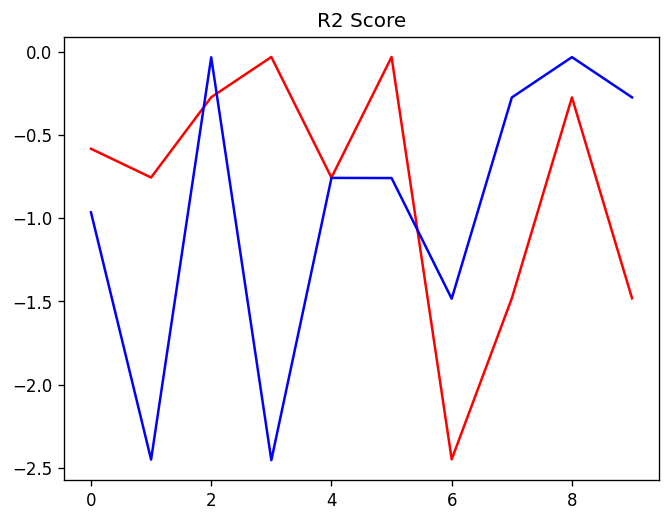

In [25]:
plt.figure(dpi = 120)
plt.plot(r2_psuedo, c = 'r')
plt.plot(r2_quant, c = 'b')
plt.title("R2 Score")